# Taxi Dataset Analysis
Source: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page


Imoport der Daten und korrekte Zuordnung der entsprechenden Datentypen

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Import dataset NY - here 2019-12
# Try to import all data was not sucessfull due to limitation of the notebook [RAM 8GB]
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
dtypes = {'VendorID': str, 
          'tpep_pickup_datetime': str,
          'tpep_dropoff_datetime': str,
          'passenger_count': float,
          'trip_distance': float,
          'RatecodeID': str,
          'store_and_fwd_flag': str,
          'PULocationID': str,
          'DOLocationID': str,
          'payment_type': str,
          'fare_amount': float,
          'extra': float,
          'mta_tax': float,
          'tip_amount': float,
          'tolls_amount': float,
          'improvement_surcharge': float,
          'total_amount': float,
          'congestion_surcharge': float
         }

filename = 'yellow_tripdata_2019-12.csv'
chunks = pd.read_csv(filename, chunksize=1000000, dtype = dtypes, parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
df = pd.concat(chunks)

df.drop('congestion_surcharge', axis = 1, inplace = True)

In [2]:
# Import whole year / only suitable with sufficient RAM 

'''

dfs = []
for i, j in enumerate(months):
    filename = 'yellow_tripdata_2019-{}.csv'.format(j)
    chunks = pd.read_csv(filename, chunksize=1000000, dtype = dtypes, parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
    df[i] = pd.concat(chunks)

df_all = df[0]
for i in range(1, 12):
    df_all = df_all.append(dfs[i])

'''

"\n\ndfs = []\nfor i, j in enumerate(months):\n    filename = 'yellow_tripdata_2019-{}.csv'.format(j)\n    chunks = pd.read_csv(filename, chunksize=1000000, dtype = dtypes, parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'])\n    df[i] = pd.concat(chunks)\n\ndf_all = df[0]\nfor i in range(1, 12):\n    df_all = df_all.append(dfs[i])\n\n"

Elimination of datapoints with null-values and overview on the general characteristics of the dataset

In [3]:
# Eliminate NULL-Values
mask = ~df['VendorID'].isnull()
df = df.loc[mask, :]

# Check about remaining NULL-Values and data-types
print('Übersicht NULL-Values:\n', df.isnull().sum() / df.shape[0], '\n')
print('Übersicht Datentypen:\n', df.dtypes, '\n')
print('Anzahl Datensätze: {}'.format(df.shape[0]))

Übersicht NULL-Values:
 VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
dtype: float64 

Übersicht Datentypen:
 VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                     object
fare_amount                     float64
ext

## Analysis of the Taxi-Market in NY-city
### Overview on the players in the market

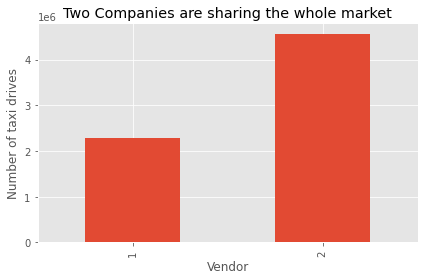

In [4]:
df.groupby('VendorID')['total_amount'].count().plot(kind = 'bar')
plt.title('Two Companies are sharing the whole market')
plt.ylabel('Number of taxi drives')
plt.xlabel('Vendor')
plt.tight_layout()
plt.show()

weekdays ordered by the earnings

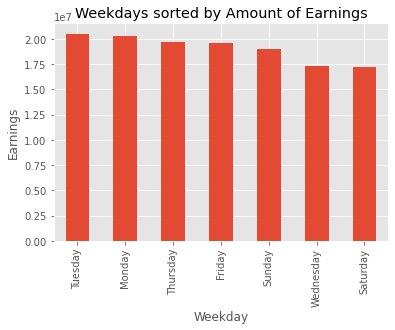

In [5]:
df.groupby(df['tpep_pickup_datetime'].dt.day_name())['total_amount'].sum().sort_values(ascending = False).plot(kind = 'bar')
plt.title('Weekdays sorted by Amount of Earnings')
plt.xlabel('Weekday')
plt.ylabel('Earnings')
plt.show()

Best locations overall

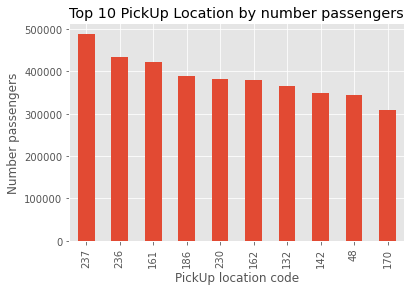

In [6]:
sites = df.groupby('PULocationID')['passenger_count'].sum()
sites.sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.title('Top 10 PickUp Location by number passengers')
plt.ylabel('Number passengers')
plt.xlabel('PickUp location code')
plt.show()

### Top Locations by weekday
for each day of a week the main locations are plotted

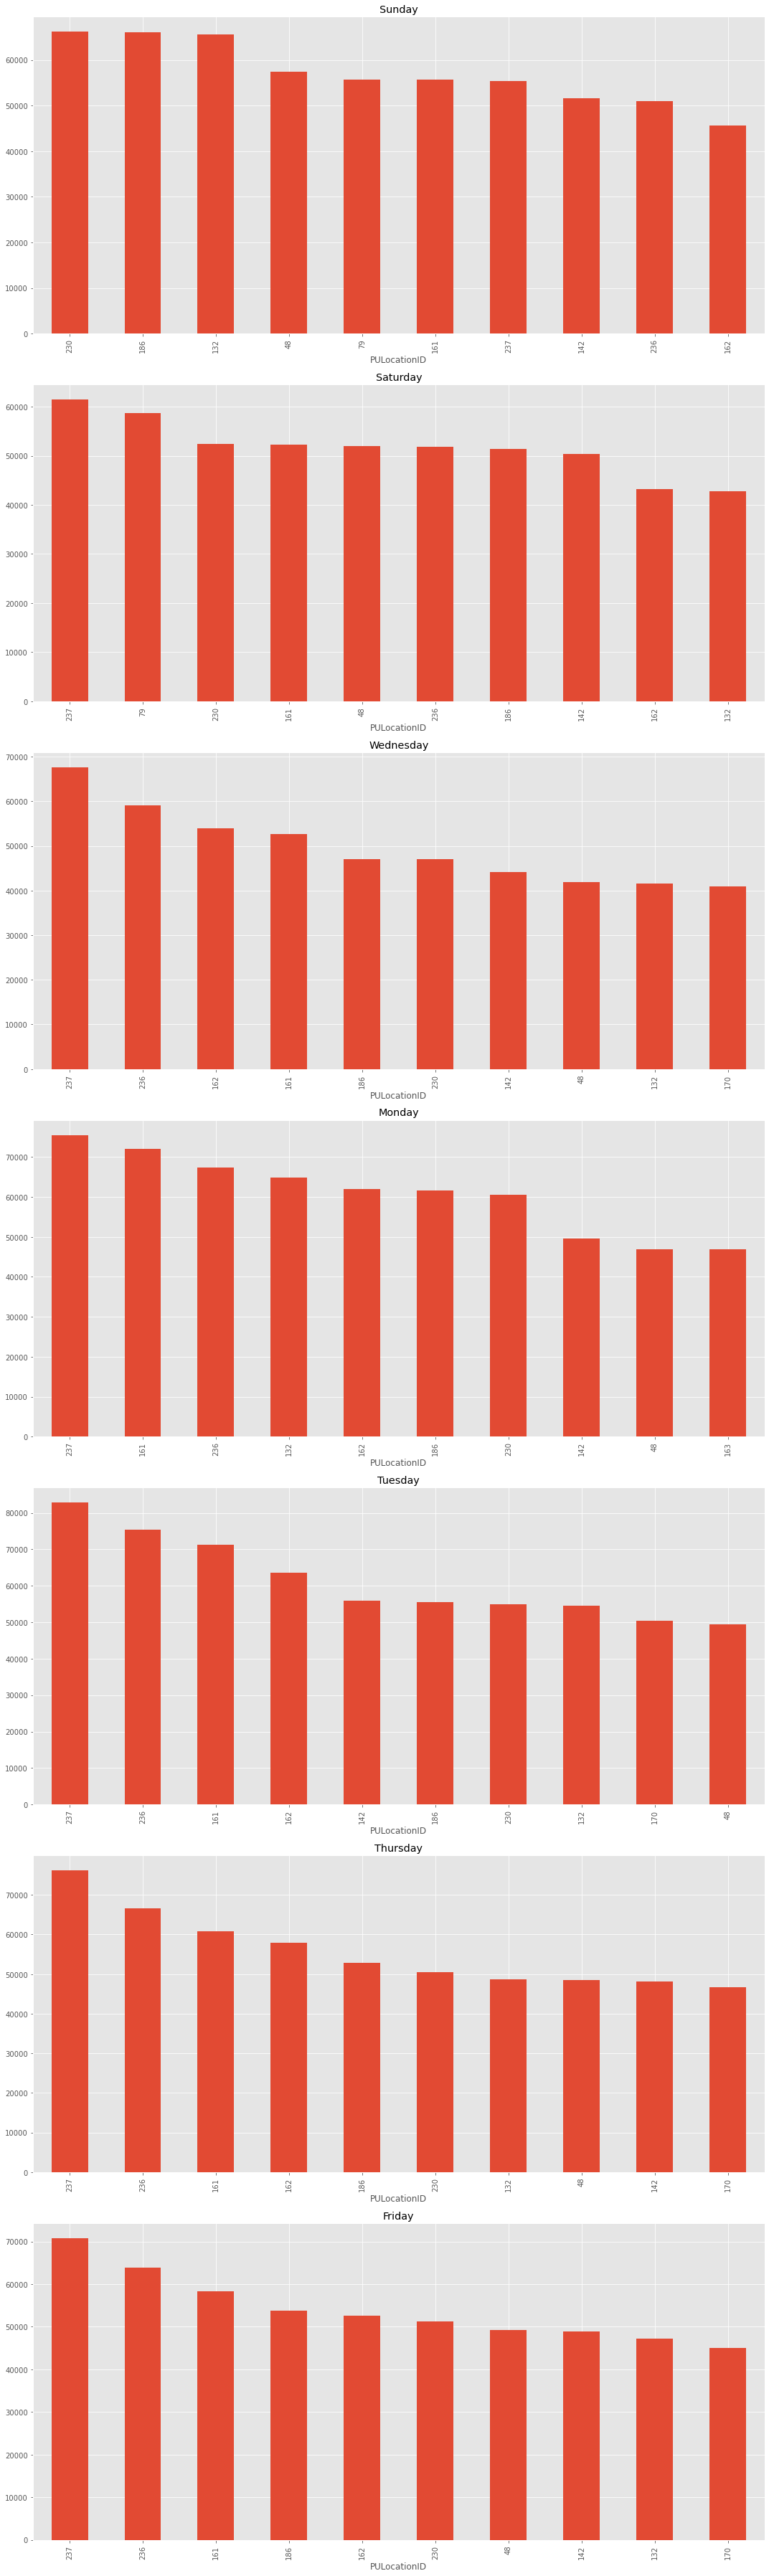

In [7]:
wds = df['tpep_pickup_datetime'].dt.day_name().unique()
fig, ax = plt.subplots(nrows = wds.shape[0], figsize = [15, 50])

for i in range(wds.shape[0]):
    mask = df['tpep_pickup_datetime'].dt.day_name() == wds[i]
    df_wd = df.loc[mask, :]
    sites = df_wd.groupby('PULocationID')['passenger_count'].sum()
    sites.sort_values(ascending = False).head(10).plot(kind = 'bar', ax = ax[i])
    ax[i].set_title(wds[i])
    
plt.tight_layout()    
plt.show()